<a href="https://colab.research.google.com/github/kellischeuble/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/KelliS_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-21 23:49:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-01-21 23:49:37 (495 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project', 'budget', 
                  'physician-free-freeze', 'el-salvador-aid', 'religious-groups',
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 
                  'immigration', 'synfuels', 'education', 'right-to-sue', 
                  'crime', 'duty-free', 'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values='?')
df.head()

,party,handicapped-infants,water-project,budget,physician-free-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace({'y':1, 'n':0})

In [0]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

In [0]:
# Confidence Interval of the mean democratic support on the 'budget' bill

sample_mean = dem['budget'].mean()
print("sample mean: ", sample_mean)

sample mean:  0.8884615384615384


In [0]:
# make confidence_interval function

def confidence_interval(data, confidence = 0.95):
  # make sure data is in numpy array
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # need to specify dof=1 because numpy defaults to population stdev.
  s = np.std(data, ddof=1)
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error, margin_of_error)

In [0]:
budget_not_null = dem[dem['budget'].isnull() == False]

CIM = confidence_interval(budget_not_null['budget'])
CI = CIM[:3]
margin_of_error = CIM[-1]

# Margin of error:
print("margin of error:", margin_of_error)
print("ranges:", CI)


margin of error: 0.03851802312746677
ranges: (0.8884615384615384, 0.8499435153340716, 0.9269795615890052)


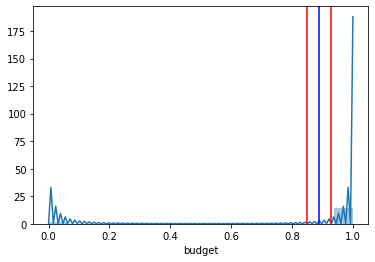

In [0]:
# graphically represent confidence interval

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(budget_not_null['budget'])
plt.axvline(x=CI[0], color='blue')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='red');

The margin of error is about 3%. This gives us a pretty accurate probability of what the average democratic vote is for the budget bill.

In [0]:
import pandas as pd
import scipy.stats as stats

# Chi squared tests
# Forest fire data

fire_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'


In [0]:
df = pd.read_csv(fire_data_url)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


LOOK at fire data and see if there is any correlation between the two categorical variables day vs month.

Null hypothesis: The two variables, day and month, are independent.
Alternative hypothesis: The two variables, day and month, are dependented.

In [0]:
categorical = df[['month', 'day']]
categorical['month'].value_counts(dropna=False)

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [0]:
categorical['day'].value_counts(dropna=False)

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [0]:
# Make crosstab

day_crosstab = pd.crosstab(categorical['month'], categorical['day'])
day_crosstab

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(day_crosstab)
print("chi^2 statistic: {}, p-value: {}, dof: {}".format(chi_2_stat, p_value, dof))

chi^2 statistic: 64.2383177767438, p-value: 0.5384475410453669, dof: 66


Based on a chi^2 statistic of 64.23 and a p-value of 0.5, we fail to reject the null hypothesis and suggest that the variables day and month the fires are taking place are independent of each other.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)